# Collect Initial Data

In [1]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Eusebio
# data_directory = "C:/Users/joaquin/Desktop/mem_aitue/Datos/"

#Mini-Eusebio
data_directory = "C:/Users/jquin/Desktop/Memoria de Titulo/Aitue/Datos/"

In [3]:

file_names = [os.path.basename(x) for x in glob.glob(data_directory+"/[!~]*.xlsx")]
dir_files = glob.glob(data_directory+"/[!~]*.xlsx")

# del file_names[-1]
# del dir_files[-1]

print(file_names)
# print(dir_files)

['AltosDelValle_Cotizaciones.xlsx', 'AltosDelValle_Negocios.xlsx', 'cotizaciones_all.xlsx', 'Junge_Cotizaciones.xlsx', 'Junge_Negocios.xlsx', 'Mil610_Cotizaciones.xlsx', 'Mil610_Negocios.xlsx', 'negocios_all.xlsx', 'SanAndresDelValle_Cotizaciones.xlsx', 'SanAndresDelValle_Negocios.xlsx', 'Urban_Cotizaciones.xlsx', 'Urban_Negocios.xlsx']


In [4]:
project_names = [];project_types = [];project_file_types = []
for file in file_names:
    project_names.append(file.split('_')[0])
    project_types.append(file.split('_')[1].split('.')[0])
    project_file_types.append(file.split('.')[1])

In [5]:
dfs = []

for file_dir in dir_files:
    df = pd.read_excel(file_dir,header=0)
    dfs.append(df)


In [6]:
def get_col_group_description(df,col):
    num_cot = []
    info = dict()
    for group, frame in df.groupby(col):
        num_cot.append(len(frame))
    #     print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

    cot_serie = pd.Series(num_cot)
    info['count'] = cot_serie.count()
    info['max'] = cot_serie.max()
    info['mean'] = cot_serie.mean()
    info['std'] = cot_serie.std()
    return info

# get_col_group_description(dfs[0],'RUT')
#dfs[0].groupby('RUT')['RUT'].count()

# Data Description Single File: Cotizacion

In [7]:
cot_resume = pd.DataFrame()

cot_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Cotizaciones']
cot_names = [project_names[index] for index in range(0,len(project_names)) if index in cot_index]
cot_types = [project_types[index] for index in range(0,len(project_types)) if index in cot_index]
cot_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in cot_index]

cot = [dfs[index] for index in range(0,len(dfs)) if index in cot_index]

#start description
cot_resume['filas'] = [x.shape[0] for x in cot]
cot_resume['cols'] = [x.shape[1] for x in cot]
cot_resume['fecha_min'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).min() for x in cot]
cot_resume['fecha_max'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).max() for x in cot]
cot_resume['ruts_unicos'] = [len(x['RUT'].unique()) for x in cot]
cot_resume['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in cot]
cot_resume['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in cot]
cot_resume['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in cot]



In [8]:
cot_resume

,filas,cols,fecha_min,fecha_max,ruts_unicos,ruts_mean,ruts_std,ruts_max
0,442,31,2017-07-27 15:46:54,2018-04-20 15:33:46.000,231,1.913420,1.351760,10
1,801,31,2016-01-19 08:53:16,2018-04-19 12:42:56.000,320,2.503125,2.439228,20
2,1719,31,2016-09-22 16:36:03,2018-04-19 19:01:45.000,729,2.358025,1.946240,16
3,10593,31,2013-08-19 16:58:26,2018-04-27 12:13:48.000,3743,2.830083,2.866900,45
4,2683,31,2017-03-24 18:36:24,2018-04-26 18:17:22.430,1206,2.224710,1.697962,13


In [9]:
cot_resume.describe()

,filas,cols,ruts_unicos,ruts_mean,ruts_std,ruts_max
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000
mean,3247.600000,31.0,1245.800000,2.365872,2.060418,20.800000
std,4197.247169,0.0,1448.412821,0.338759,0.600108,14.024978
min,442.000000,31.0,231.000000,1.913420,1.351760,10.000000
25%,801.000000,31.0,320.000000,2.224710,1.697962,13.000000
50%,1719.000000,31.0,729.000000,2.358025,1.946240,16.000000
75%,2683.000000,31.0,1206.000000,2.503125,2.439228,20.000000
max,10593.000000,31.0,3743.000000,2.830083,2.866900,45.000000


# Data Description Single File: Negocios

In [10]:
neg_resume = pd.DataFrame()

neg_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Negocios']
neg_names = [project_names[index] for index in range(0,len(project_names)) if index in neg_index]
neg_types = [project_types[index] for index in range(0,len(project_types)) if index in neg_index]
neg_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in neg_index]

neg = [dfs[index] for index in range(0,len(dfs)) if index in neg_index]

#start description
neg_resume['filas'] = [x.shape[0] for x in neg]
neg_resume['cols'] = [x.shape[1] for x in neg]
neg_resume['fecha_min'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).min() for x in neg]
neg_resume['fecha_max'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).max() for x in neg]
neg_resume['ruts_unicos'] = [len(x['RUT'].unique()) for x in neg]
neg_resume['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in neg]
neg_resume['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in neg]
neg_resume['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in neg]

neg_resume['%es_anulados']  = [(len(x[x['Estado'] == 'Anulada'])/y) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_promesas']  = [(len(x[x['Estado'] == 'Promesado'])/y) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_reserva']   = [len(x[x['Estado'] == 'Reservado'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%esc_desistido'] = [len(x[x['Estado Comercial'] == 'Desistimiento'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%esc_normal']    = [len(x[x['Estado Comercial'] == 'Normal'])/y for x,y in zip(neg,neg_resume['filas'])]

In [11]:
neg_resume

,filas,cols,fecha_min,fecha_max,ruts_unicos,ruts_mean,ruts_std,ruts_max,%es_anulados,%es_promesas,%es_reserva,%esc_desistido,%esc_normal
0,100,38,2017-07-27 15:46:58.750,2018-04-17 13:42:58.670,57,1.754386,1.366444,7,0.670000,0.220000,0.110000,0.040000,0.950000
1,101,38,2016-01-25 13:21:02.013,2018-04-18 18:25:01.797,52,1.942308,1.487378,7,0.504950,0.079208,0.188119,0.128713,0.811881
2,76,38,2016-09-26 16:12:56.703,2018-04-19 12:00:18.270,47,1.617021,0.898143,5,0.500000,0.065789,0.065789,0.065789,0.868421
3,1814,38,2013-08-19 18:35:56.620,2018-04-26 16:05:35.993,801,2.264669,1.822735,17,0.661521,0.085998,0.122933,0.127894,0.829658
4,196,38,2017-03-27 17:03:29.563,2018-04-26 16:50:07.440,120,1.633333,1.194760,8,0.500000,0.331633,0.168367,0.147959,0.841837


In [12]:
neg_resume.describe()

,filas,cols,ruts_unicos,ruts_mean,ruts_std,ruts_max,%es_anulados,%es_promesas,%es_reserva,%esc_desistido,%esc_normal
count,5.00000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,457.40000,38.0,215.400000,1.842343,1.353892,8.800000,0.567294,0.156526,0.131042,0.102071,0.860359
std,759.75575,0.0,328.700928,0.269511,0.343082,4.711688,0.089960,0.116057,0.048522,0.046507,0.054167
min,76.00000,38.0,47.000000,1.617021,0.898143,5.000000,0.500000,0.065789,0.065789,0.040000,0.811881
25%,100.00000,38.0,52.000000,1.633333,1.194760,7.000000,0.500000,0.079208,0.110000,0.065789,0.829658
50%,101.00000,38.0,57.000000,1.754386,1.366444,7.000000,0.504950,0.085998,0.122933,0.127894,0.841837
75%,196.00000,38.0,120.000000,1.942308,1.487378,8.000000,0.661521,0.220000,0.168367,0.128713,0.868421
max,1814.00000,38.0,801.000000,2.264669,1.822735,17.000000,0.670000,0.331633,0.188119,0.147959,0.950000


# Describe Data Combined Files: Cotizacion

In [13]:
# concat cotizaciones
cot_all = pd.concat(cot)
cot_all.to_excel(data_directory + 'cotizaciones_all.xlsx')
cot_all_resume = pd.DataFrame()

In [14]:
cot_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16238 entries, 0 to 2682
Data columns (total 31 columns):
ID                     16238 non-null int64
Fecha Cotizacion       16238 non-null object
Medio                  16238 non-null object
Tipo de Medio          15715 non-null object
Proyecto               16238 non-null object
Etapa                  16238 non-null object
Productos              15851 non-null object
Presencial             14203 non-null object
Remoto                 12667 non-null object
Jefe Comercial         16238 non-null object
Ejecutivo Comercial    16238 non-null object
Total Productos        16200 non-null float64
Descuentos             15951 non-null float64
Valor Final Venta      15951 non-null float64
RUT                    16238 non-null object
Nombre                 16238 non-null object
Apellido 1             16198 non-null object
Apellido 2             16190 non-null object
Nombre Completo        16238 non-null object
Telefono               1964 non-nul

[Text(0,0.5,'Atributos'), Text(0.5,0,'Valores Nulo vs Total Filas')]

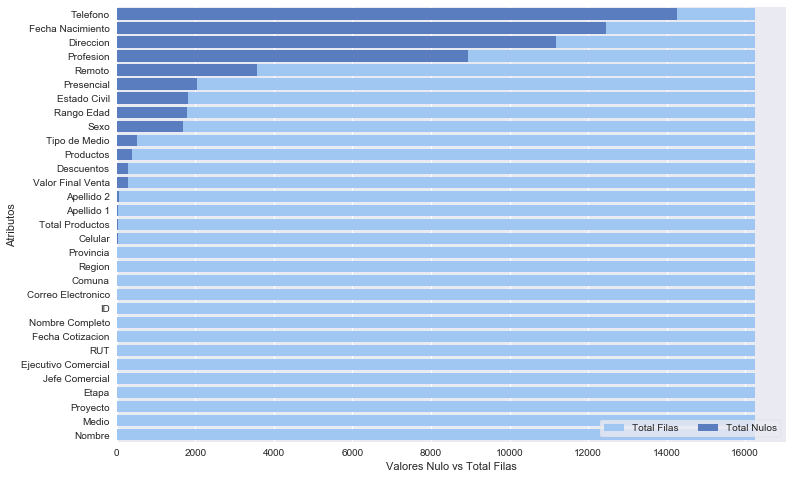

In [54]:
df = cot_all
null_columns = df.columns[df.isnull().any()]
nulos = df[null_columns].isnull().sum()

#view columns with null only
# null_columns = df.columns[df.isnull().any()]
# null_df = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

null_df = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=null_df.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
# sb.despine(left=True, bottom=True)

In [16]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

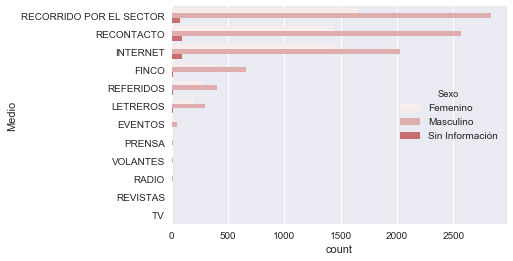

In [17]:
ver_atributo_categorico(cot_all,'Medio',hue='Sexo')

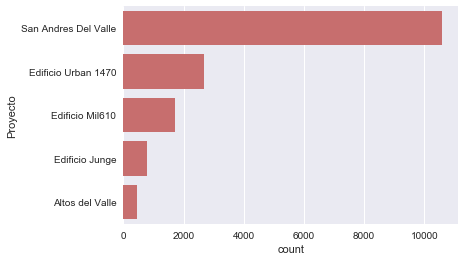

In [18]:
ver_atributo_categorico(cot_all,'Proyecto')

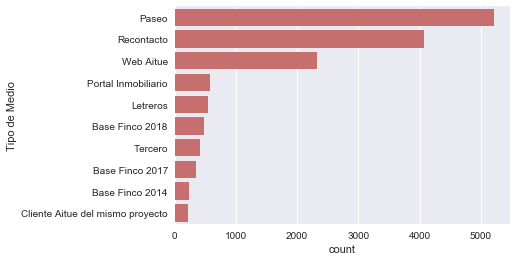

In [19]:
ver_atributo_categorico(cot_all,'Tipo de Medio',lim=10,limit=True)

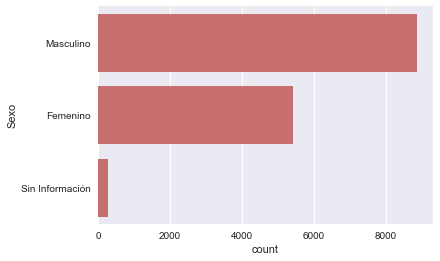

In [20]:
ver_atributo_categorico(cot_all,'Sexo')

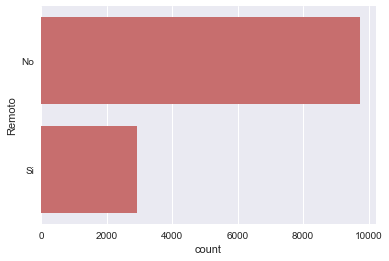

In [21]:
ver_atributo_categorico(cot_all,'Remoto')

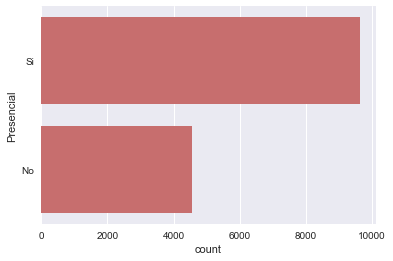

In [22]:
ver_atributo_categorico(cot_all,'Presencial')

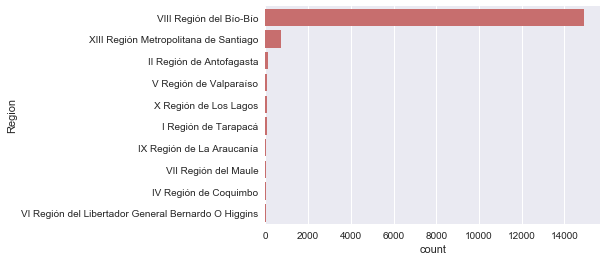

In [23]:
ver_atributo_categorico(cot_all,'Region',lim=10,limit=True)

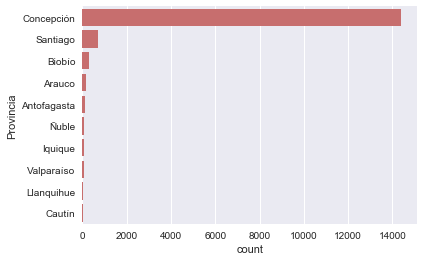

In [24]:
ver_atributo_categorico(cot_all,'Provincia',lim=10,limit=True)

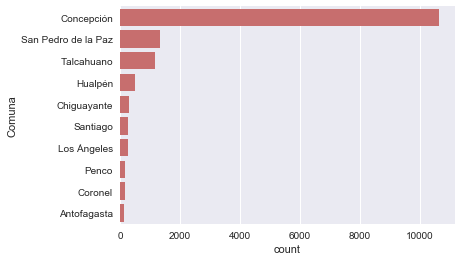

In [25]:
ver_atributo_categorico(cot_all,'Comuna',lim=10,limit=True)

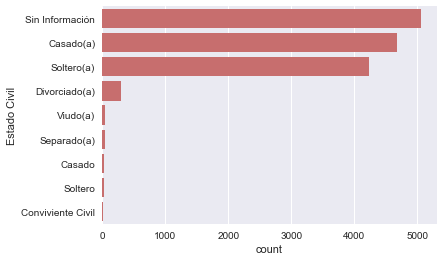

In [26]:
ver_atributo_categorico(cot_all,'Estado Civil')

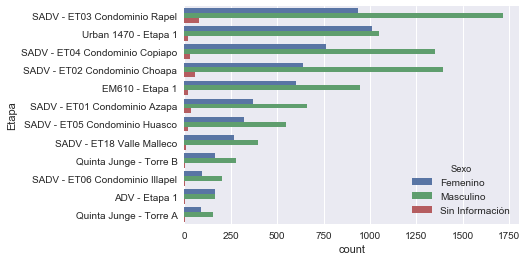

In [27]:
palette=["C0","C1","C2"]
ver_atributo_categorico(cot_all,'Etapa',hue='Sexo',palette=palette)

[Text(0.5,0,'total'), Text(0.5,0,'total')]

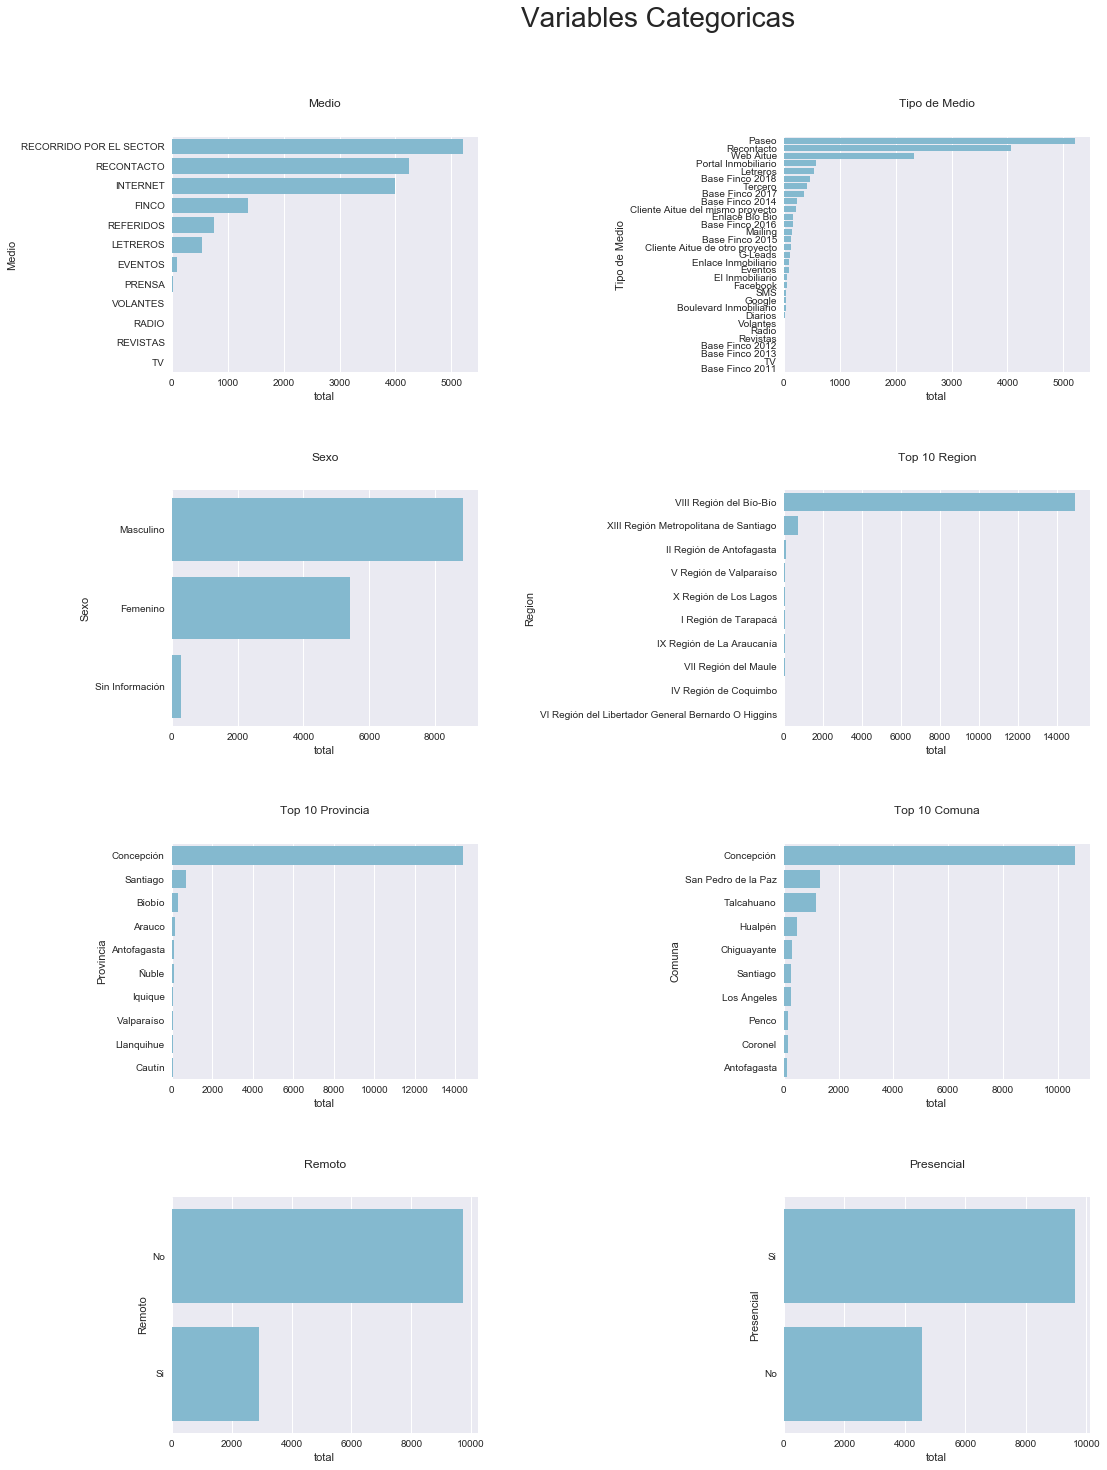

In [28]:
df = cot_all

fig, ax = plt.subplots(figsize=(15,20), ncols=2, nrows=4)

left   =  0.05  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  1    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

# The amount of space above titles
y_title_margin = 1.1

plt.suptitle("Variables Categoricas", y = 1.09, fontsize=28)

###[0][:]

ax[0][0].set_title("Medio",y = y_title_margin)
ax[0][1].set_title("Tipo de Medio",y = y_title_margin)
# ax[0][2].set_title("Starndardized (StardardScaler)", y = y_title_margin)

sb.countplot(y='Medio', data=cot_all, color="c", order=cot_all['Medio'].value_counts().index,ax=ax[0][0]);
sb.countplot(y='Tipo de Medio', data=cot_all, color="c", order=cot_all['Tipo de Medio'].value_counts().index,ax=ax[0][1]);

# Set all labels on the row axis of subplots for bathroom data to "bathrooms"
[ax[0][i].set_xlabel("total") for i in range(0, 2)]

###[1][:]

ax[1][0].set_title("Sexo", y = y_title_margin)
ax[1][1].set_title("Top 10 Region", y = y_title_margin)

sb.countplot(y='Sexo', data=cot_all, color="c", order=cot_all['Sexo'].value_counts().index[:10],ax=ax[1][0]);
sb.countplot(y='Region', data=cot_all, color="c", order=cot_all['Region'].value_counts().index[:10],ax=ax[1][1]);
# Set all labels on the row axis of subplots for square_feet data to "square_feet"

[ax[1][i].set_xlabel("total") for i in range(0, 2)]

###[2][:]
ax[2][0].set_title("Top 10 Provincia",y = y_title_margin)
ax[2][1].set_title("Top 10 Comuna",y = y_title_margin)

sb.countplot(y='Provincia', data=cot_all, color="c", order=cot_all['Provincia'].value_counts().index[:10],ax=ax[2][0]);
sb.countplot(y='Comuna', data=cot_all, color="c", order=cot_all['Comuna'].value_counts().index[:10],ax=ax[2][1]);

# Set all labels on the row axis of subplots for square_feet data to "square_feet"
[ax[2][i].set_xlabel("total") for i in range(0, 2)]

###[2][:]
ax[3][0].set_title("Remoto",y = y_title_margin)
ax[3][1].set_title("Presencial",y = y_title_margin)

sb.countplot(y='Remoto', data=cot_all, color="c", order=cot_all['Remoto'].value_counts().index[:10],ax=ax[3][0]);
sb.countplot(y='Presencial', data=cot_all, color="c", order=cot_all['Presencial'].value_counts().index[:10],ax=ax[3][1]);

# Set all labels on the row axis of subplots for square_feet data to "square_feet"
[ax[3][i].set_xlabel("total") for i in range(0, 2)]

In [29]:
#rows
df = cot_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  16238
Columnas:  31
Primer Registro:  2013-08-19 16:58:26
Ultimo Registro:  2018-04-27 12:13:48
Ruts Unicos:  5905


# Explore Data: Cotizacion

In [30]:
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])


Cot rut promedio:  2.7498729889923794
Cot rut desviacion:  2.69495797931767
Cot por rut maximo:  45


# Describe Data Combined Files: Negociacion

In [31]:
neg_all = pd.concat(neg)
neg_all.to_excel(data_directory +'negocios_all.xlsx')
neg_all_resume = pd.DataFrame()

In [32]:
neg_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 195
Data columns (total 38 columns):
ID                               2287 non-null int64
Fecha Cotizacion                 2287 non-null object
ID Cotizacion                    2287 non-null int64
Medio                            2287 non-null object
Tipo de Medio                    2287 non-null object
Proyecto                         2287 non-null object
Etapa                            2287 non-null object
Productos                        2263 non-null object
Jefe Comercial                   2287 non-null object
Ejecutivo Comercial              2287 non-null object
Total Productos                  2287 non-null float64
Descuentos                       2286 non-null float64
Valor Final Venta                2286 non-null float64
Estado                           2287 non-null object
Estado Comercial                 2287 non-null object
Fecha Promesa                    547 non-null datetime64[ns]
Fecha Escritura       

[Text(0,0.5,'Atributos'), Text(0.5,0,'Valores Nulo vs Total Filas')]

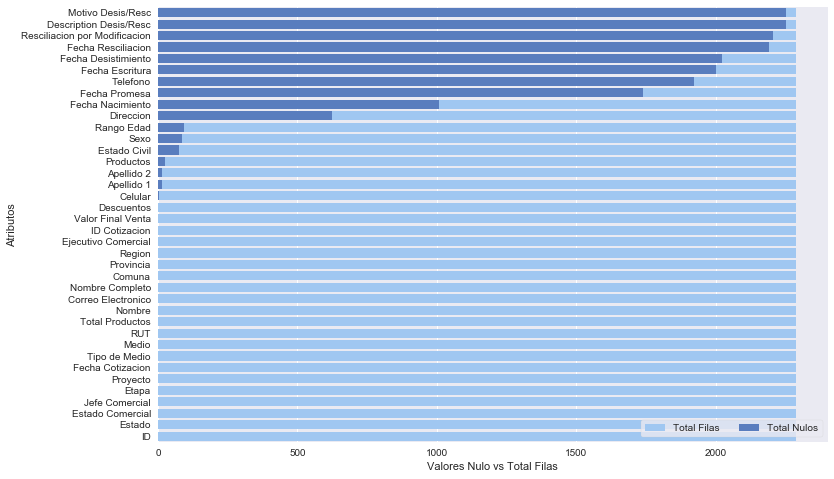

In [33]:
df = neg_all
#view columns with null only
# null_columns = df.columns[df.isnull().any()]
# null_df = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

nulos = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=nulos.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")

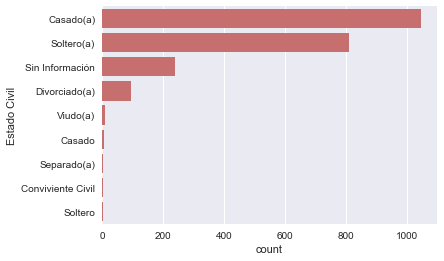

In [34]:
ver_atributo_categorico(neg_all,'Estado Civil')

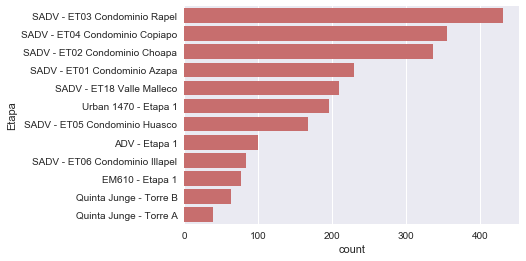

In [35]:
ver_atributo_categorico(neg_all,'Etapa')

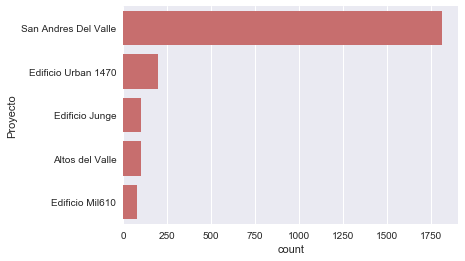

In [36]:
ver_atributo_categorico(neg_all,'Proyecto')

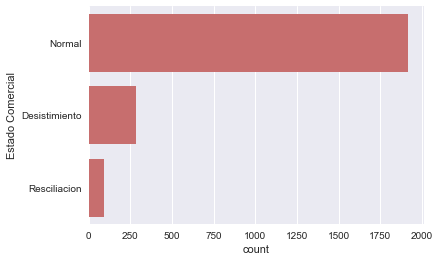

In [37]:
ver_atributo_categorico(neg_all,'Estado Comercial')

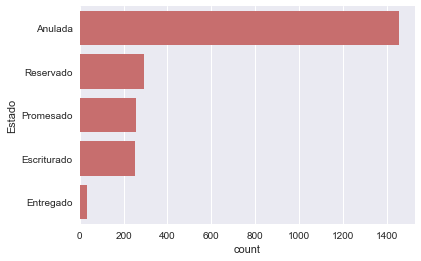

In [38]:
ver_atributo_categorico(neg_all,'Estado')

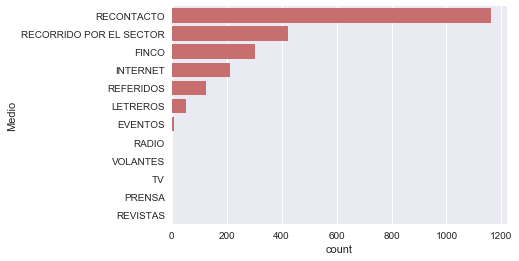

In [39]:
ver_atributo_categorico(neg_all,'Medio')

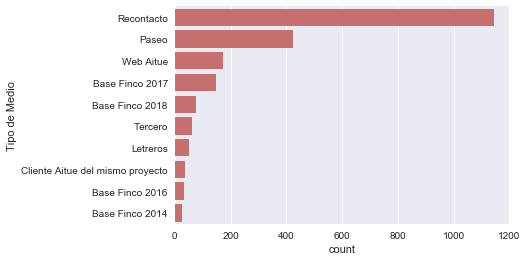

In [40]:
ver_atributo_categorico(neg_all,'Tipo de Medio',limit=True,lim=10)

In [41]:
#rows
df = neg_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  2287
Columnas:  38
Primer Registro:  2013-08-19 18:35:56.620000
Ultimo Registro:  2018-04-26 16:50:07.440000
Ruts Unicos:  1068


# Data Exploration: Negocios

In [42]:
print("Neg rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Neg rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Neg por rut maximo: ",get_col_group_description(df,'RUT')['max'])
print("Neg estado anulados: ",len(df[df['Estado'] == 'Anulada'])/neg_all.shape[0])
print("Neg estado promesa: ",len(df[df['Estado'] == 'Promesado'])/neg_all.shape[0])
print("Neg estado reservado: ",len(df[df['Estado'] == 'Reservado'])/neg_all.shape[0])
print("Neg estado comercial desistimiento: ",len(df[df['Estado Comercial'] == 'Desistimiento'])/neg_all.shape[0])
print("Neg estado comercial normal: ",len(df[df['Estado Comercial'] == 'Normal'])/neg_all.shape[0])

Neg rut promedio:  2.141385767790262
Neg rut desviacion:  1.7300613369691278
Neg por rut maximo:  17
Neg estado anulados:  0.6357673808482729
Neg estado promesa:  0.11193703541757762
Neg estado reservado:  0.12724092697857456
Neg estado comercial desistimiento:  0.12374289462177525
Neg estado comercial normal:  0.8364669873196328


In [43]:
#columns droped 'Fecha Promesa', 'Telefono', 'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion', 
# 'Resciliacion por Modificacion', 'Motivo Desis/Resc', 'Description Desis/Resc'

#columnas no importantes para el sgte paso
unimportant_columns = ['Apellido 1','Apellido 2','Celular','Ejecutivo Comercial','Region','Provincia','Jefe Comercial','ID']
to_select_cols = df.count().sort_values(ascending=True).index.tolist()
to_select_cols = to_select_cols[8:]
to_select_cols = [item for item in to_select_cols if item not in unimportant_columns]
to_select_cols

['Fecha Nacimiento',
 'Direccion',
 'Rango Edad',
 'Sexo',
 'Estado Civil',
 'Productos',
 'Descuentos',
 'Valor Final Venta',
 'Nombre Completo',
 'Fecha Cotizacion',
 'Comuna',
 'Correo Electronico',
 'Nombre',
 'RUT',
 'ID Cotizacion',
 'Medio',
 'Tipo de Medio',
 'Proyecto',
 'Etapa',
 'Estado Comercial',
 'Estado',
 'Total Productos']

## Exploracion de los ruts 

In [50]:
## Clientes en Negocios que no estan en Cotizaciones

cot_rut = cot_all['RUT'].unique().tolist()
neg_rut = neg_all['RUT'].unique().tolist()

not_in = [item for item in neg_rut if item not in cot_rut]
not_in

## Clientes en Cotizaciones que no estan en Negocios

not_in = [item for item in cot_rut if item not in neg_rut]
len(not_in)

print(len(cot_rut))

print(len(neg_rut))

print(len(not_in) +len(neg_rut))

## Exploracion de ID y ID COTIZACION 

In [72]:
# hay 7 id_negocio que tienen mas de un id_cotizacion
print("Filas :",neg_all['ID Cotizacion'].shape[0])
print("ID Cot unicos ",len(neg_all['ID Cotizacion'].unique()))

Filas : 2287
ID Cot unicos  2280


In [71]:
neg_id_cot_count = neg_all.groupby('ID Cotizacion').count().sort_values(by='ID',ascending=False)
neg_multiples_id = neg_id_cot_count[neg_id_cot_count['ID'] >= 2]

neg_id_rep = neg_multiples_id['ID'].index.tolist()

# view = neg_all.loc[neg_all['ID Cotizacion']==multiple_rows[1]]
view = neg_all.loc[neg_all['ID Cotizacion'].isin(neg_id_rep)]
view.loc[:,to_select_cols]
# df.loc[df['column_name'].isin(some_values)]

,Fecha Nacimiento,Direccion,Rango Edad,Sexo,Estado Civil,Productos,Descuentos,Valor Final Venta,Nombre Completo,Fecha Cotizacion,...,Nombre,RUT,ID Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Estado Comercial,Estado,Total Productos
85,1967-01-20,Camino Al Venado 585,41-50,Femenino,Casado(a),"Est-56,TB-203,TB-204,Est-55",268.0,5772.0,Maria de la Luz Polidori Erle,2018-03-13 17:06:17.773,...,Maria de la Luz,9879501-4,129130,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,Normal,Anulada,6040.0
88,1967-01-20,Camino Al Venado 585,41-50,Femenino,Casado(a),"TB-204,TB-203,Est-55,Est-56",268.0,5772.0,Maria de la Luz Polidori Erle,2018-03-21 12:57:33.463,...,Maria de la Luz,9879501-4,129130,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,Normal,Reservado,6040.0
4,NaT,Avenida inglesa 220 9F Pedro de Valdivia,61+,Masculino,Casado(a),NaN,0.0,8934.0,Gustavo Arturo Spoerer O´Reilly,2016-02-12 10:17:56.403,...,Gustavo Arturo,4028907-0,80512,REFERIDOS,Tercero,Edificio Junge,Quinta Junge - Torre B,Normal,Anulada,8934.0
5,NaT,Avenida inglesa 220 9F Pedro de Valdivia,61+,Masculino,Casado(a),NaN,0.0,8934.0,Gustavo Arturo Spoerer O´Reilly,2016-02-12 10:25:47.217,...,Gustavo Arturo,4028907-0,80512,REFERIDOS,Tercero,Edificio Junge,Quinta Junge - Torre B,Normal,Anulada,8934.0
6,NaT,Avenida inglesa 220 9F Pedro de Valdivia,61+,Masculino,Casado(a),"25,Est-018,Bod-40,Est-126",0.0,8934.0,Gustavo Arturo Spoerer O´Reilly,2016-02-12 11:24:21.993,...,Gustavo Arturo,4028907-0,80512,REFERIDOS,Tercero,Edificio Junge,Quinta Junge - Torre B,Normal,Escriturado,8934.0
13,NaT,Vilumanque,20-30,Masculino,Soltero(a),"24,Bod-22,Est-005",0.0,5447.0,Cristian Jesus Marcos Garcia,2016-08-25 11:52:14.453,...,Cristian Jesus,16766381-8,92052,REFERIDOS,Cliente Aitue de otro proyecto,Edificio Junge,Quinta Junge - Torre B,Normal,Anulada,5447.0
14,NaT,Vilumanque,20-30,Masculino,Soltero(a),"24,Bod-22,Est-005,Lan-24",0.0,5447.0,Cristian Jesus Marcos Garcia,2016-09-01 14:22:44.230,...,Cristian Jesus,16766381-8,92052,REFERIDOS,Cliente Aitue de otro proyecto,Edificio Junge,Quinta Junge - Torre B,Resciliacion,Promesado,5447.0
125,1985-10-04,av. Los Presidentes 1533 Depto casa 5,31-40,Masculino,Casado(a),3,0.0,3835.0,Claudio Alberto Gajardo Salazar,2014-04-19 13:34:19.360,...,Claudio Alberto,16138640-5,35119,RECORRIDO POR EL SECTOR,Paseo,San Andres Del Valle,SADV - ET02 Condominio Choapa,Normal,Anulada,3835.0
135,1979-08-19,Ramón Carrasco 239 Depto 264,41-50,Masculino,Divorciado(a),8,0.0,3532.0,Mario Marcel Barra De la Parra,2014-04-22 18:50:56.453,...,Mario Marcel,13628528-9,35327,RECONTACTO,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,Normal,Anulada,3532.0
142,1979-08-19,Ramón Carrasco 239 Depto 264,41-50,Masculino,Divorciado(a),8,0.0,3532.0,Mario Marcel Barra De la Parra,2014-04-28 12:04:47.370,...,Mario Marcel,13628528-9,35327,RECONTACTO,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,Resciliacion,Promesado,3532.0


# Data Description Table Relations: Negocios & Cotizaciones

## Columnas

In [46]:
cot_cols = cot_all.columns.tolist()
neg_cols = neg_all.columns.tolist()

In [47]:
#columnas de negocios que no estan en las columnas de cotizaciones
not_in = [item for item in neg_cols if item not in cot_cols]
not_in

['ID Cotizacion',
 'Estado',
 'Estado Comercial',
 'Fecha Promesa',
 'Fecha Escritura',
 'Fecha Desistimiento',
 'Fecha Resciliacion',
 'Motivo Desis/Resc',
 'Description Desis/Resc',
 'Resciliacion por Modificacion']

In [48]:
#columnas de cotizaciones que no estan en las columnas de negocios
not_in = [item for item in cot_cols if item not in neg_cols]
not_in

['Presencial', 'Remoto', 'Profesion']

In [49]:
#columnas compartidas
not_in = [item for item in cot_cols if item in neg_cols]
not_in

['ID',
 'Fecha Cotizacion',
 'Medio',
 'Tipo de Medio',
 'Proyecto',
 'Etapa',
 'Productos',
 'Jefe Comercial',
 'Ejecutivo Comercial',
 'Total Productos',
 'Descuentos',
 'Valor Final Venta',
 'RUT',
 'Nombre',
 'Apellido 1',
 'Apellido 2',
 'Nombre Completo',
 'Telefono',
 'Celular',
 'Direccion',
 'Region',
 'Provincia',
 'Comuna',
 'Correo Electronico',
 'Sexo',
 'Estado Civil',
 'Rango Edad',
 'Fecha Nacimiento']

## Merging de las tablas (Necesario?). Negocios es subconjunto de Cotizacion

In [53]:
print(cot_all['ID'].shape[0])
print(len(cot_all['ID'].unique()))

neg_all.set_index('ID Cotizacion')
cot_all.set_index('ID')
print(neg_all.shape[0])
print(cot_all.shape[0])

merged_all =pd.merge(cot_all, neg_all, how='inner', left_index=True, right_index=True)
merged_all.shape[0]

16238
16238
2287
16238


8955